In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os

os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_in_vitro_total_RNA/")

In [4]:
rpmH_TCS_df = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_rpmH_TCS_raw.tsv", sep="\t")

In [5]:
rpmH_TCS_df

,SeqID,Pos,Strand,Ish_7_S20,Ish_8_S21,Ish_9_S22,Ish_10_S23,Ish_11_S24,Ish_12_S25,T_aveLogCPM,NT_aveLogCPM,aveLogFC,Letter
0,NC_000913.3,1,+,0.530866,0.567520,0.858851,0.708576,0.540349,0.530562,-0.525505,-0.590484,0.064979,A
1,NC_000913.3,2,+,0.096521,0.305588,0.268391,0.202450,0.000000,0.151589,-1.874707,-2.219095,0.344389,U
2,NC_000913.3,3,+,1.640858,2.051803,1.825059,0.101225,0.000000,0.151589,0.918359,-2.588342,3.506701,G
3,NC_000913.3,4,+,0.193042,0.174622,0.161035,0.067483,0.000000,0.113692,-2.153301,-2.906962,0.753662,A
4,NC_000913.3,5,+,0.482605,0.305588,0.697817,0.438643,0.540349,0.265281,-0.902838,-1.245296,0.342458,A
5,NC_000913.3,6,+,0.144782,0.261932,0.429426,0.202450,0.270174,0.341076,-1.632317,-1.646967,0.014650,A
6,NC_000913.3,7,+,0.627387,0.480209,0.483104,0.573609,0.540349,0.720049,-0.789878,-0.547649,-0.242230,C
7,NC_000913.3,8,+,0.482605,0.567520,0.429426,0.033742,0.000000,0.037897,-0.877245,-3.581710,2.704465,G
8,NC_000913.3,9,+,0.289563,0.218277,0.214713,0.506126,0.270174,0.265281,-1.790186,-1.218971,-0.571215,C
9,NC_000913.3,10,+,1.303034,0.567520,1.932415,1.248444,0.540349,1.743276,0.373818,0.498636,-0.124818,A


In [28]:
def draw_t_nt_barplot(tcs_df, t_subplot, nt_subplot, invisible_subplot, label, rlen):
    def SEM(x):
        return(np.std(x, ddof=1)/np.sqrt(len(x)))
    
    T_columns = ["Ish_7_S20", "Ish_8_S21", "Ish_9_S22"]
    NT_columns = ["Ish_10_S23", "Ish_11_S24", "Ish_12_S25"]
    title_font_size=30
    AA_font_size = 30
    
    ylim = (0, max(tcs_df[T_columns+NT_columns].max())*1.01)
    print(ylim)
    
    for i, row in tcs_df.iterrows():
        
        t_subplot.bar(x = row["Pos"],
                      height = np.mean(row[T_columns]),
                      align = "center",
                      yerr = SEM(row[T_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="red",
                      linewidth=0.5)
        t_subplot.plot(np.repeat(row["Pos"], len(T_columns)), 
                       row[T_columns], 
                       marker="o", 
                       linestyle="None",
                       color="black", markersize=5)
        
        nt_subplot.bar(x = row["Pos"],
                      height = np.mean(row[NT_columns]),
                      align = "center",
                      yerr = SEM(row[NT_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="grey",
                      linewidth=0.5)
        nt_subplot.plot(np.repeat(row["Pos"], len(NT_columns)), 
                        row[NT_columns], 
                        marker="o", 
                        linestyle="None",
                        color="black", markersize=5)
    
    for subplot in (t_subplot, nt_subplot):
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.tick_params(axis="x", labelsize=title_font_size)
        subplot.tick_params(axis="y", labelsize=title_font_size)
    
    t_subplot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    t_subplot.set_ylabel("T", size=title_font_size, weight="bold")
    nt_subplot.set_ylabel("NT", size=title_font_size, weight="bold")
    #nt_subplot.set_xlabel("Coding region positions, nt", size=15)
    nt_subplot.set_xticks(tcs_df["Pos"].tolist())
    nt_subplot.set_xticklabels([str(x) for x in tcs_df["Pos"].tolist()])
    
    t_subplot.set_ylim(ylim)
    nt_subplot.set_ylim(ylim)
    
    rect_wh = ylim[1]*0.1
    rectangle_array = list()

    codon_list = list()
    for i in range(0, len(tcs_df), rlen):
        codon_list.append(tcs_df.sort_values(by="Pos")["Letter"].tolist()[i:(i+3)])

    for i in range(len(tcs_df)//rlen):
        if i % 2 == 0:
            r_color = "grey"
        else:
            r_color = "lightgrey"
        rectangle_array.append(Rectangle((i*rlen+0.5, -rect_wh*1.2), rlen, rect_wh, clip_on=False, facecolor=r_color))

    for r, codon in zip(rectangle_array, codon_list):
        t_subplot.add_patch(r)
        rx, ry = r.get_xy()
        text_y = ry + r.get_height()/2
        for i, letter in enumerate(codon):
            text_x = rx + i*r.get_width()/rlen + r.get_width()/(rlen*2)
            t_subplot.annotate(codon[i], (text_x, text_y), size=AA_font_size, color="black", weight="bold", ha="center", va="center", annotation_clip=False)
    
    invisible_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    invisible_subplot.set_ylabel("5' ends coverage, CPM", size=title_font_size, labelpad=60)
    #invisible_subplot.set_title(label, size=title_font_size, loc='left', weight="bold")
    invisible_subplot.set_title(label, 
                                size=title_font_size, 
                                weight="bold",
                                position=(0.01, 0.95), 
                                horizontalalignment='left', 
                                transform=invisible_subplot.transAxes)

(0, 5.457522776376919)


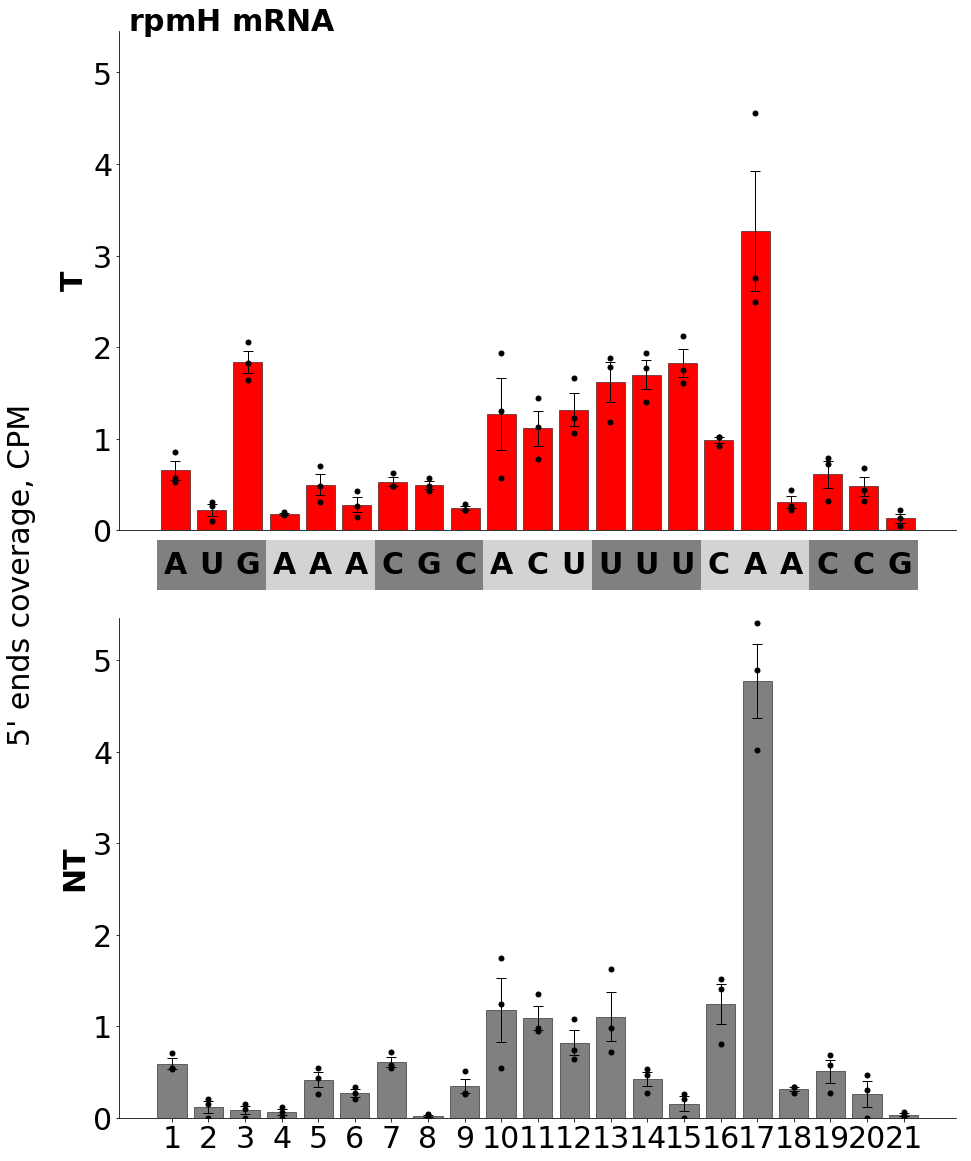

In [30]:
figure = plt.figure(figsize=(15,20))

grid = plt.GridSpec(10, 1, wspace=0.25, hspace=3)

rpmH_TCS_t_plot = figure.add_subplot(grid[0:5, 0:1])
rpmH_TCS_nt_plot = figure.add_subplot(grid[5:10, 0:1])
rpmH_TCS_invisible_plot = figure.add_subplot(grid[0:10, 0:1], frameon=False)

draw_t_nt_barplot(rpmH_TCS_df, 
                  t_subplot=rpmH_TCS_t_plot, 
                  nt_subplot=rpmH_TCS_nt_plot, 
                  invisible_subplot=rpmH_TCS_invisible_plot, 
                  label="$\mathbf{rpmH}$ mRNA", rlen=3)

figure.savefig("Results/Pictures/Ec_total_RNA_rpmH_N5E_coverage.png", dpi=200)